In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../data/processed/news.csv')


In [3]:
df['pub_date'] = pd.to_datetime(df['pub_date'])
df.head()

,pub_date,title,lead,section,keywords
0,2023-01-01 01:27:54+00:00,T.C.U. Upends Michigan in Wild Playoff Semifinal,"GLENDALE, Ariz. — Sonny Dykes is not the ideal...",Sports,"['Football (College)', 'Big 12 Conference', 'B..."
1,2023-01-01 04:00:10+00:00,"In Bucha, a Final Rampage Served as a Coda to ...","BUCHA, Ukraine — On one of the last nights of ...",World,"['Bucha (Ukraine)', 'War Crimes, Genocide and ..."
2,2023-01-01 05:06:06+00:00,Georgia Downs Ohio State in Semifinal on Last-...,ATLANTA — The Georgia Bulldogs appeared very n...,Sports,"['Football (College)', 'College Football Playo..."
3,2023-01-01 08:00:11+00:00,How Should You Be? Try Taking Suggestions.,Some chapters of life attract advice. After a ...,Style,"['Philosophy', 'Ethics (Personal)', 'Callard, ..."
4,2023-01-01 08:00:12+00:00,"‘Suddenly, It Appeared as Though the Bus Was G...",Dear Diary:,New York,['New York City']


C:\Users\Hiep\AppData\Local\Temp\ipykernel_31400\1703141213.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['pub_date'].dt.to_period('M')


<Axes: title={'center': 'Số lượng bài báo theo tháng'}, xlabel='month'>

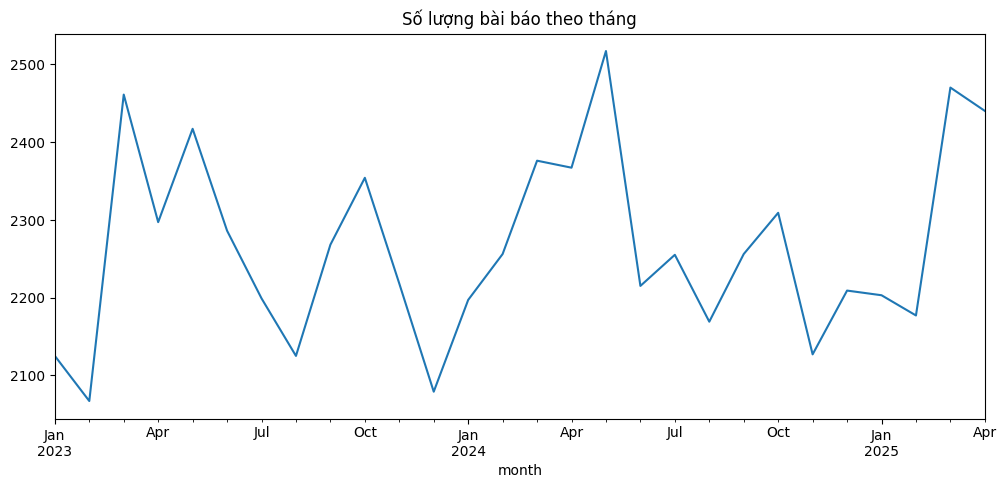

In [4]:
df['pub_date'] = pd.to_datetime(df['pub_date'])
df['month'] = df['pub_date'].dt.to_period('M')
df.groupby('month').size().plot(kind='line', title='Số lượng bài báo theo tháng', figsize=(12, 5))


<Axes: title={'center': 'Top 20 chuyên mục báo phổ biến'}, ylabel='section'>

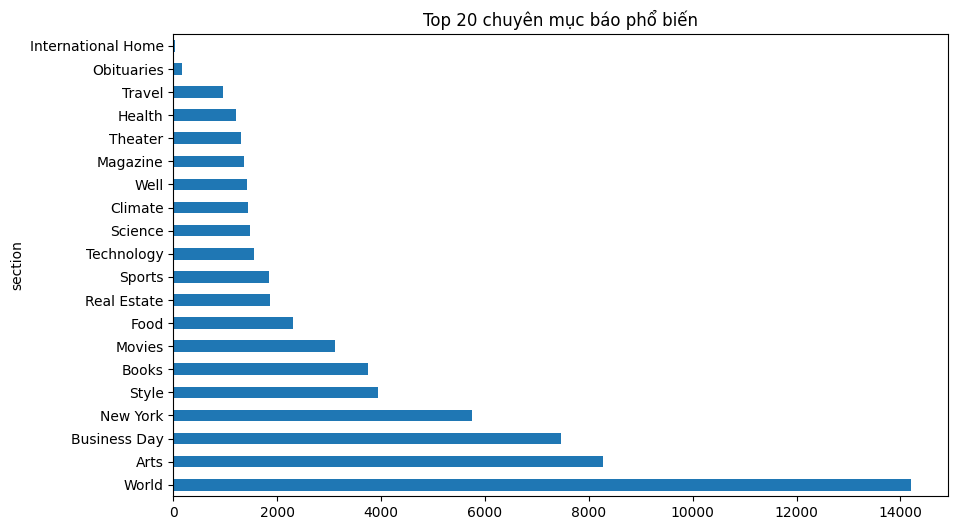

In [5]:
df['section'].value_counts().nlargest(20).plot(kind='barh', title='Top 20 chuyên mục báo phổ biến', figsize=(10, 6))


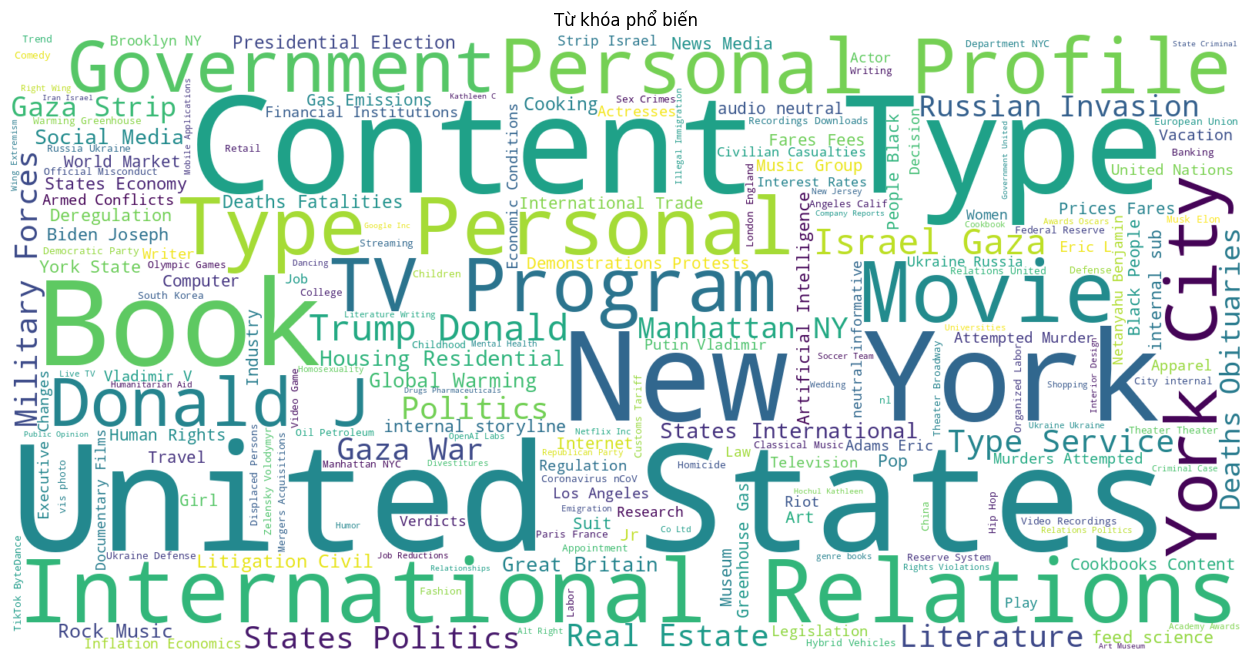

In [6]:
from ast import literal_eval
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_keywords = df['keywords'].dropna().apply(literal_eval).explode()
text = ' '.join(all_keywords.astype(str))

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Từ khóa phổ biến")
plt.show()


C:\Users\Hiep\AppData\Local\Temp\ipykernel_31400\2847094595.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['pub_date'].dt.to_period('M')


<Axes: title={'center': 'Xu hướng bài báo theo chuyên mục'}, xlabel='month'>

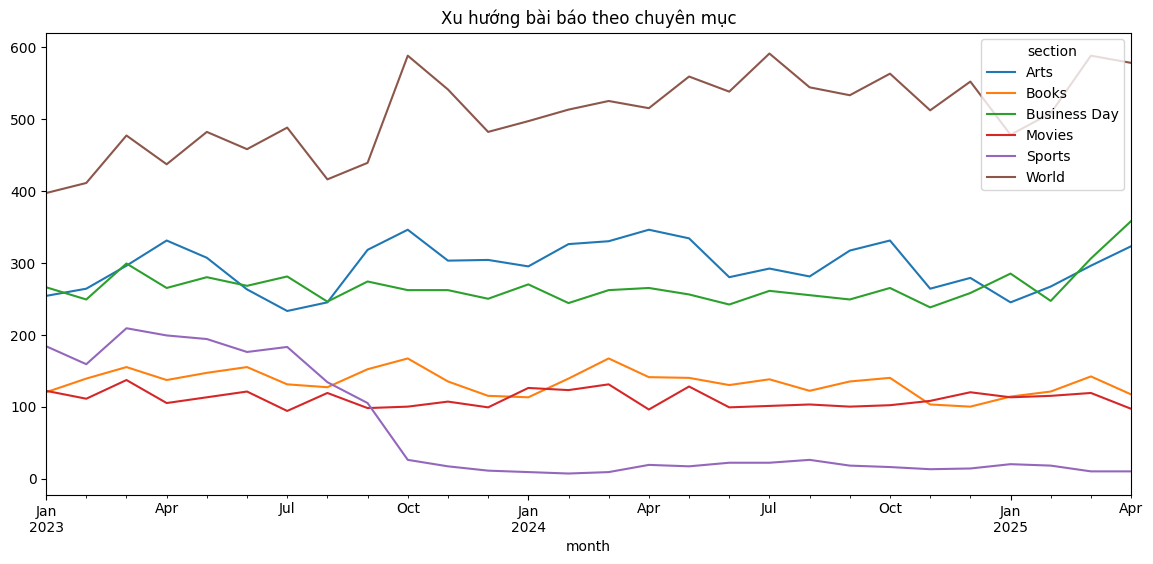

In [9]:
top_sections = ['World','Arts','Business Day', 'Movies', 'Sports', 'Books']
df['month'] = df['pub_date'].dt.to_period('M')
df_top = df[df['section'].isin(top_sections)]

section_trends = df_top.groupby(['month', 'section']).size().unstack().fillna(0)
section_trends.plot(kind='line', figsize=(14, 6), title='Xu hướng bài báo theo chuyên mục')
